# **Importing Data**

In [ ]:
# Importing all the Libraries
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# Step 2: Google drive mounted locally
from google.colab import drive
drive.mount('/content/drive')
% ls      
% cd drive/   
% ls
% cd My\ Drive  
% ls
!head -4 data/Police_Department_Incident_Reports__2018_to_Present.csv

Mounted at /content/drive
drive/  sample_data/
/content/drive
MyDrive/
/content/drive/My Drive
 bq-results-20211115-164409-qu1u4q94j0u4/  'Dissertation document'/
 bq-results-20211115-171708-9d60r7sjz825/   histogram_numeric_variables.png
'Colab Notebooks'/                          numeric_feature_histogram.png
 data/                                      sf_neighborhoods.json
Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Pol

In [ ]:
# Step 3: CSV file is read to import the dataset
# https://stackoverflow.com/questions/15008970/way-to-read-first-few-lines-for-pandas-dataframe - limiting the lines of rows i read in dataframe
# sfpd = pd.read_csv('data/Police_Department_Incident_Reports__2018_to_Present.csv', skiprows=range(2, 20000), nrows=200000)
sfpd = pd.read_csv('data/Police_Department_Incident_Reports__2018_to_Present.csv')


# **Data Exploration**

In [ ]:
# Step 4: Information related to sfpd dataset is being displayed
sfpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566650 entries, 0 to 566649
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     566650 non-null  object 
 1   Incident Date                                         566650 non-null  object 
 2   Incident Time                                         566650 non-null  object 
 3   Incident Year                                         566650 non-null  int64  
 4   Incident Day of Week                                  566650 non-null  object 
 5   Report Datetime                                       566650 non-null  object 
 6   Row ID                                                566650 non-null  int64  
 7   Incident ID                                           566650 non-null  int64  
 8   Incident Number                             

In [ ]:
sfpd

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,...,-122.413487,POINT (-122.41348740024354 37.77999173926721),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,-122.427819,POINT (-122.42781910073226 37.77578657487239),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,-122.422830,POINT (-122.42283006837721 37.72394419349765),90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,...,-122.403636,POINT (-122.40363551943442 37.7751608100771),32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,...,-122.413623,POINT (-122.4136227157606 37.80275505740129),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566645,2021/01/15 08:00:00 PM,2021/01/15,20:00,2021,Friday,2021/01/18 11:03:00 PM,99729103074,997291,210041000,210183477.0,...,-122.412148,POINT (-122.41214750780264 37.78589292711297),20.0,NaN,1.0,NaN,NaN,NaN,10.0,5.0
566646,2020/08/01 05:34:00 PM,2020/08/01,17:34,2020,Saturday,2020/08/01 06:04:00 PM,94911806361,949118,200461010,202142200.0,...,-122.476169,POINT (-122.47616919036905 37.780475849410344),5.0,NaN,NaN,NaN,NaN,NaN,4.0,8.0
566647,2020/06/01 01:55:00 AM,2020/06/01,01:55,2020,Monday,2020/06/01 01:55:00 AM,93192005061,931920,200330863,201530294.0,...,-122.389860,POINT (-122.38985954971992 37.75399971361786),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
566648,2020/10/24 05:00:00 PM,2020/10/24,17:00,2020,Saturday,2020/10/24 06:34:00 PM,97231606244,972316,200642975,202982445.0,...,-122.433219,POINT (-122.43321873935555 37.777490366353746),23.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0


In [ ]:
# Determing the coulmn names of the dataset
sfpd.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'Point', 'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [ ]:
# Step 4: Calculating total categorical and numerical column in the dataset
Col_categoric = list(sfpd.select_dtypes(include='object').columns)
print(f"sfpd has {len(Col_categoric)} categorical columns:\n", Col_categoric)
Col_numeric = list(sfpd.select_dtypes(exclude='object').columns)
print(f"sfpd has {len(Col_numeric)} numerical cloumns:\n", Col_numeric)


sfpd has 16 categorical columns:
 ['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Day of Week', 'Report Datetime', 'Report Type Code', 'Report Type Description', 'Filed Online', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'Police District', 'Analysis Neighborhood', 'Point']
sfpd has 18 numerical cloumns:
 ['Incident Year', 'Row ID', 'Incident ID', 'Incident Number', 'CAD Number', 'Incident Code', 'CNN', 'Supervisor District', 'Latitude', 'Longitude', 'Neighborhoods', 'ESNCAG - Boundary File', 'Central Market/Tenderloin Boundary Polygon - Updated', 'Civic Center Harm Reduction Project Boundary', 'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas', 'Current Supervisor Districts', 'Current Police Districts']


In [ ]:
# Step 5: Finding the total number of columns and rows of the dataset
print('sfpd has  {} columns and {} rows.'.format(sfpd.shape[0], sfpd.shape[1]))

sfpd has  566650 columns and 34 rows.


## Distribution of numerical variables in being described

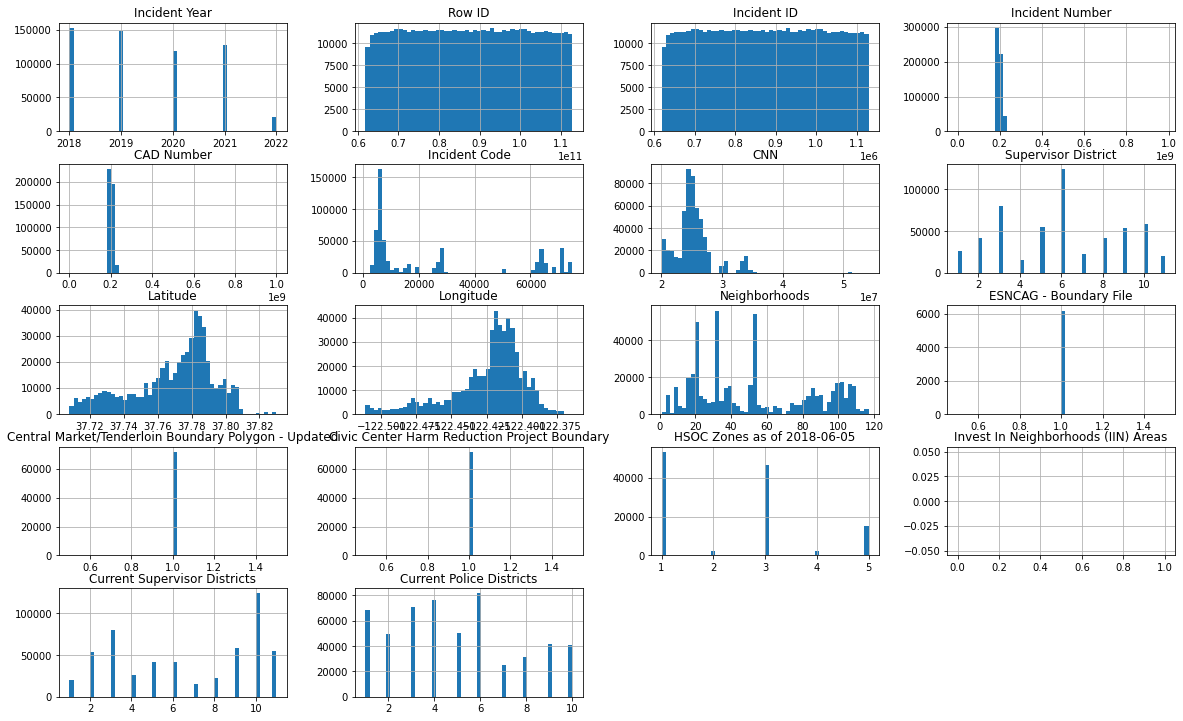

In [ ]:
# https://aisel.aisnet.org/cgi/viewcontent.cgi?article=1003&context=acis2020
%matplotlib inline
sfpd.hist(bins=50, figsize=(20,15),layout=(6,4))
plt.savefig('histogram_numeric_variables.png')
plt.show()

In [ ]:
# Step 6: Dataframe statistical information can be gathered using function named as .describe()
# https://www.kaggle.com/code/shinichioto/folium-and-other-visualization-models-etc
sfpd.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
count,566650.000000,5.666500e+05,5.666500e+05,5.666500e+05,4.416630e+05,566650.000000,5.373620e+05,537362.000000,537362.000000,537362.000000,525790.000000,6189.0,71604.0,71507.0,119673.000000,0.0,537273.000000,536688.000000
mean,2019.499132,8.745322e+10,8.745319e+05,1.965466e+08,1.975400e+08,24868.745757,2.532421e+07,5.966267,37.769242,-122.423992,53.004658,1.0,1.0,1.0,2.365956,NaN,6.671191,4.910369
std,1.207829,1.463367e+10,1.463367e+05,1.278112e+07,2.202840e+07,25756.355444,3.096556e+06,2.811496,0.024384,0.026335,32.639729,0.0,0.0,0.0,1.386134,NaN,3.331826,2.745525
min,2018.000000,6.186871e+10,6.186870e+05,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295,1.000000,1.0,1.0,1.0,1.000000,NaN,1.000000,1.000000
25%,2018.000000,7.479047e+10,7.479042e+05,1.862124e+08,1.835320e+08,6244.000000,2.396500e+07,3.000000,37.755229,-122.434622,23.000000,1.0,1.0,1.0,1.000000,NaN,3.000000,3.000000
50%,2019.000000,8.745562e+10,8.745560e+05,1.961389e+08,1.934226e+08,7041.000000,2.492400e+07,6.000000,37.775695,-122.417806,50.000000,1.0,1.0,1.0,3.000000,NaN,7.000000,5.000000
75%,2021.000000,1.000845e+11,1.000845e+06,2.100628e+08,2.103120e+08,51040.000000,2.645600e+07,8.000000,37.785893,-122.407323,86.000000,1.0,1.0,1.0,3.000000,NaN,10.000000,7.000000
max,2022.000000,1.129068e+11,1.129068e+06,9.814243e+08,1.000000e+09,75030.000000,5.420300e+07,11.000000,37.829991,-122.363743,117.000000,1.0,1.0,1.0,5.000000,NaN,11.000000,10.000000


# **Data Analysis**

In [ ]:
# https://www.kaggle.com/code/yashdamle/qstp-crime-classification 
sfpd.groupby("Incident Category")["Incident Category"].count().sort_values(ascending=False)

Incident Category
Larceny Theft                                   171974
Other Miscellaneous                              40865
Malicious Mischief                               38239
Non-Criminal                                     34415
Assault                                          34043
Burglary                                         32295
Motor Vehicle Theft                              27765
Recovered Vehicle                                21339
Warrant                                          17415
Fraud                                            17017
Lost Property                                    16845
Drug Offense                                     13220
Robbery                                          12856
Missing Person                                   12483
Suspicious Occ                                   11540
Disorderly Conduct                                9436
Offences Against The Family And Children          7956
Traffic Violation Arrest                       

### Function to check NAN 

In [ ]:
# Step 7: To extract the first few rows .head() function is used
# https://www.kaggle.com/code/shinichioto/folium-and-other-visualization-models-etc
sfpd.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,...,-122.413487,POINT (-122.41348740024354 37.77999173926721),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,-122.427819,POINT (-122.42781910073226 37.77578657487239),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,-122.422830,POINT (-122.42283006837721 37.72394419349765),90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,...,-122.403636,POINT (-122.40363551943442 37.7751608100771),32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,...,-122.413623,POINT (-122.4136227157606 37.80275505740129),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [ ]:
# https://aisel.aisnet.org/cgi/viewcontent.cgi?article=1003&context=acis2020
# function is created to calculate the missing value
def val_missing(sf):
# Finding out total number of values which are missing
 sfpd2 = sfpd.isnull().sum()
# Percentage of missing values
 percent_mis_val = 100 * sfpd.isnull().sum() / len(sf)
# Create table of results
 table_mis_val = pd.concat([sfpd2, percent_mis_val], axis=1)
# Names of coulnmn being renamed
 rename_table_mis_col = table_mis_val.rename(
 columns = {0 : 'Missing values', 1 : '% of Total Values'})
# The table is being sorted by missing descedning percentage
 rename_table_mis_col = rename_table_mis_col[
 rename_table_mis_col.iloc[:,1] != 0].sort_values(
'% of Total Values', ascending=False).round(1)
# Printing the details
 print ("sfpd has " + str(sfpd.shape[1]) + " columns.\n"
"and it has " + str(rename_table_mis_col.shape[0]) +
" columns which has missing values.")
# missing values datasframe is being returned
 return rename_table_mis_col

In [ ]:
val_miss = val_missing(sfpd)

val_miss.head(20)

sfpd has 34 columns.
and it has 19 columns which has missing values.


,Missing values,% of Total Values
Invest In Neighborhoods (IIN) Areas,566650,100.0
ESNCAG - Boundary File,560461,98.9
Civic Center Harm Reduction Project Boundary,495143,87.4
Central Market/Tenderloin Boundary Polygon - Updated,495046,87.4
Filed Online,453372,80.0
HSOC Zones as of 2018-06-05,446977,78.9
CAD Number,124987,22.1
Neighborhoods,40860,7.2
Current Police Districts,29962,5.3
Analysis Neighborhood,29399,5.2


In [ ]:
sfpd2 = sfpd.copy

# **Data Formatting**

In [ ]:
# Step 8: coulmns are being dropped and it is being assigned to sfpd2
sfpd2=sfpd.drop(['Current Police Districts','Current Supervisor Districts','Invest In Neighborhoods (IIN) Areas', 'HSOC Zones as of 2018-06-05','Civic Center Harm Reduction Project Boundary','Central Market/Tenderloin Boundary Polygon - Updated','ESNCAG - Boundary File','Supervisor District','Analysis Neighborhood','CNN','Incident Description','Incident Code','Filed Online','Report Type Description','Report Type Code','CAD Number','Incident Number','Incident ID','Row ID','Report Datetime','Incident Datetime','Point','Neighborhoods'],axis=1)

In [ ]:
sfpd2.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Resolution,Intersection,Police District,Latitude,Longitude
0,2019/03/05,21:00,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487
1,2018/12/22,12:00,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819
2,2018/08/24,17:30,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830
3,2018/10/20,15:10,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636
4,2019/06/05,00:36,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623


In [ ]:
sfpd2.isna().sum()

Incident Date               0
Incident Time               0
Incident Year               0
Incident Day of Week        0
Incident Category         484
Incident Subcategory      484
Resolution                  0
Intersection            29288
Police District             0
Latitude                29288
Longitude               29288
dtype: int64

In [ ]:
sfpd2.dropna(inplace=True)

In [ ]:
sfpd2.isna().sum()

Incident Date           0
Incident Time           0
Incident Year           0
Incident Day of Week    0
Incident Category       0
Incident Subcategory    0
Resolution              0
Intersection            0
Police District         0
Latitude                0
Longitude               0
dtype: int64

In [ ]:
sfpd2.isnull().sum()

Incident Date           0
Incident Time           0
Incident Year           0
Incident Day of Week    0
Incident Category       0
Incident Subcategory    0
Resolution              0
Intersection            0
Police District         0
Latitude                0
Longitude               0
dtype: int64

In [ ]:
sfpd2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
566645    False
566646    False
566647    False
566648    False
566649    False
Length: 536890, dtype: bool

In [ ]:
# https://www.kaggle.com/code/gonzalogarciafuste/sf-crime-classification-and-nice-graphics/notebook
print(sfpd2.duplicated(keep=False).value_counts())
sfpd3 = sfpd2.drop_duplicates()

False    486497
True      50393
dtype: int64


In [ ]:
sfpd3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
566645    False
566646    False
566647    False
566648    False
566649    False
Length: 509588, dtype: bool

In [ ]:
sfpd3.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Resolution,Intersection,Police District,Latitude,Longitude
0,2019/03/05,21:00,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487
1,2018/12/22,12:00,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819
2,2018/08/24,17:30,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830
3,2018/10/20,15:10,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636
4,2019/06/05,00:36,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623


In [ ]:
# Step 17: Finding out the correlation between columns
corr_mat = sfpd3.corr()
corr_mat

,Incident Year,Latitude,Longitude
Incident Year,1.000000,-0.021720,-0.023707
Latitude,-0.021720,1.000000,0.154316
Longitude,-0.023707,0.154316,1.000000


In [ ]:
# Step 11: Name of columns are being renamed 
sfpd4 = sfpd3.rename(columns={'Incident Category':'IncidentCategory', 'Incident Date':'IncidentDate', 'Incident Time':'IncidentTime', 'Incident Year':'IncidentYear', 'Incident Day of Week':'IncidentDayofWeek', 'Police District':'PoliceDistrict','Incident Subcategory':'IncidentSubcategory'})

In [ ]:
sfpd4.head()

,IncidentDate,IncidentTime,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude
0,2019/03/05,21:00,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487
1,2018/12/22,12:00,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819
2,2018/08/24,17:30,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830
3,2018/10/20,15:10,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636
4,2019/06/05,00:36,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623


### Using Split Function

In [ ]:
sfpd4[['IncidentYear','IncidentMonth','IncidentDate']] = sfpd4['IncidentDate'].str.split('/',expand=True)

In [ ]:
sfpd4[['IncidentHour','IncidentMinutes']] = sfpd4['IncidentTime'].str.split(':',expand=True)

In [ ]:
sfpd4.head(2)

,IncidentDate,IncidentTime,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes
0,05,21:00,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,03,21,00
1,22,12:00,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,00


In [ ]:
sfpd4=sfpd4.drop(['IncidentTime'],axis=1)

In [ ]:
sfpd4['Is_weekend'] = np.where(sfpd4['IncidentDayofWeek'].isin(['Sunday','Saturday']),1,0)
sfpd5 = sfpd4

In [ ]:
sfpd5.head(2)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend
0,05,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,03,21,00,0
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,00,1


### Feature Extraction

In [ ]:
# https://medium.com/mlearning-ai/san-francisco-crime-classification-ffa2cd02a1bf
def extract_season(month):
  """Determine season from month"""
  if 4 <= month <= 6:
    return 'summer'
  elif 7 <= month <= 9:
    return 'rainy'
  elif 10 <= month <= 12:
    return 'winter'
  else:
    return 'spring'

In [ ]:
sfpd5['IncidentMonth'] = pd.to_numeric(sfpd5['IncidentMonth'])
sfpd5['Season'] = sfpd5['IncidentMonth'].apply(lambda x:extract_season(x))

In [ ]:
sfpd5['PoliceDistrict'].unique()

array(['Tenderloin', 'Northern', 'Ingleside', 'Southern', 'Central',
       'Bayview', 'Mission', 'Richmond', 'Park', 'Taraval', 'Out of SF'],
      dtype=object)

In [ ]:
sfpd5['IncidentCategory'].unique()

array(['Larceny Theft', 'Motor Vehicle Theft', 'Warrant',
       'Other Offenses', 'Other Miscellaneous', 'Burglary',
       'Offences Against The Family And Children', 'Robbery',
       'Lost Property', 'Fraud', 'Malicious Mischief', 'Assault',
       'Case Closure', 'Non-Criminal', 'Arson', 'Recovered Vehicle',
       'Traffic Violation Arrest', 'Drug Offense', 'Disorderly Conduct',
       'Sex Offense', 'Suspicious Occ', 'Missing Person',
       'Civil Sidewalks', 'Other', 'Miscellaneous Investigation',
       'Weapons Offense', 'Weapons Carrying Etc', 'Stolen Property',
       'Forgery And Counterfeiting', 'Vehicle Impounded', 'Prostitution',
       'Courtesy Report', 'Suspicious', 'Traffic Collision',
       'Drug Violation', 'Fire Report', 'Vandalism', 'Homicide',
       'Vehicle Misplaced', 'Human Trafficking (A), Commercial Sex Acts',
       'Embezzlement', 'Gambling', 'Liquor Laws', 'Motor Vehicle Theft?',
       'Rape', 'Suicide', 'Weapons Offence',
       'Human Trafficking,

In [ ]:
# https://medium.com/mlearning-ai/san-francisco-crime-classification-ffa2cd02a1bf
def extract_IncidentDayofWeekindex(Day):
  """IndexDayofweek"""
  if Day == 'Monday':
    return 0
  elif Day == 'Tuesday':
    return 1
  elif Day == 'Wednesday':
    return 2
  elif Day == 'Thrusday':
    return 3
  elif Day == 'Friday':
    return 4
  elif Day == 'Saturday':
    return 5
  else:
    return '6'

In [ ]:
sfpd5['IndexDayofweek'] = sfpd5['IncidentDayofWeek'].apply(lambda x:extract_IncidentDayofWeekindex(x))

In [ ]:
# https://medium.com/mlearning-ai/san-francisco-crime-classification-ffa2cd02a1bf
def extract_PoliceDistrict(PDistrict):
  """IndexPoliceDistrict"""
  if PDistrict == 'Tenderloin':
    return 0
  elif PDistrict == 'Park':
    return 1
  elif PDistrict == 'Taraval':
    return 2
  elif PDistrict == 'Northern':
    return 3
  elif PDistrict == 'Mission':
    return 4
  elif PDistrict == 'Richmond':
    return 5
  elif PDistrict == 'Ingleside':
    return 6
  elif PDistrict == 'Central':
    return 7
  elif PDistrict == 'Southern':
    return 8
  elif PDistrict == 'Bayview':
    return 9
  else:
    return 10


In [ ]:
sfpd5['IndexPoliceDistrict'] = sfpd5['PoliceDistrict'].apply(lambda x:extract_PoliceDistrict(x))

In [ ]:
# https://medium.com/mlearning-ai/san-francisco-crime-classification-ffa2cd02a1bf
def extract_IncidentCategory(CategoryType):
  """CategoryType"""
  if CategoryType in ['Robbery','Assault', 'Commercial Sex Acts','Human Trafficking (A), Commercial Sex Acts','Human Trafficking (B)']: #,'Other Miscellaneous'
    return 'NonViolent'
  # elif CategoryType in ['Rape','Human Trafficking','Burglary']:
  #   return 1
  else:
    return 'Violent'

In [ ]:
sfpd5(2)

In [ ]:
# sfpd5= sfpd5[sfpd5['CategoryType'] in ['Robbery','Assault', 'Commercial Sex Acts','Human Trafficking (A), Commercial Sex Acts','Human Trafficking (B)']]
sfpd5

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict
0,05,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,3,21,00,0,spring,1,0
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,00,1,winter,5,3
2,24,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830,8,17,30,0,rainy,4,6
3,20,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636,10,15,10,1,winter,5,8
4,05,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623,6,00,36,0,summer,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566645,15,2021,Friday,Robbery,Robbery - Other,Cite or Arrest Adult,OFARRELL ST \ SHANNON ST,Tenderloin,37.785893,-122.412148,1,20,00,0,spring,4,0
566646,01,2020,Saturday,Larceny Theft,Larceny Theft - Shoplifting,Open or Active,GEARY BLVD \ 17TH AVE,Richmond,37.780476,-122.476169,8,17,34,1,rainy,5,5
566647,01,2020,Monday,Burglary,Burglary - Commercial,Open or Active,24TH ST \ MINNESOTA ST,Bayview,37.754000,-122.389860,6,01,55,0,summer,0,9
566648,24,2020,Saturday,Larceny Theft,Larceny - From Vehicle,Open or Active,STEINER ST \ FULTON ST,Northern,37.777490,-122.433219,10,17,00,1,winter,5,3


In [ ]:
sfpd5['CategoryType'] = sfpd5['IncidentCategory'].apply(lambda x:extract_IncidentCategory(x))

In [ ]:
sfpd5.head(20)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,CategoryType
0,05,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,3,21,00,0,spring,1,0,Violent
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,00,1,winter,5,3,Violent
2,24,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830,8,17,30,0,rainy,4,6,Violent
3,20,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636,10,15,10,1,winter,5,8,Violent
4,05,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623,6,00,36,0,summer,2,7,Violent
5,12,2019,Tuesday,Larceny Theft,Larceny Theft - From Building,Open or Active,NEW MONTGOMERY ST \ JESSIE ST,Southern,37.787890,-122.401043,2,07,00,0,spring,1,8,Violent
6,07,2018,Friday,Other Miscellaneous,Other,Open or Active,03RD ST \ LA SALLE AVE,Bayview,37.737170,-122.389864,12,12,30,0,winter,4,9,Violent
7,04,2018,Thursday,Burglary,Burglary - Commercial,Cite or Arrest Adult,SAINT GEORGE ALY \ PINE ST,Central,37.791652,-122.404525,10,09,00,0,winter,6,7,Violent
8,17,2019,Friday,Offences Against The Family And Children,Other,Open or Active,SHAFTER AVE \ KEITH ST,Bayview,37.729980,-122.388855,5,17,00,0,summer,4,9,Violent
9,31,2019,Thursday,Robbery,Robbery - Commercial,Cite or Arrest Adult,PIERCE ST \ POST ST,Northern,37.784736,-122.436368,1,13,24,0,spring,6,3,NonViolent


In [ ]:
def extract_hour_type(hour):
    """Determine hour type from hour"""
    if (hour >= 4) and (hour < 12):
        return 'morning'
    elif (hour >= 12) and (hour < 15):
        return 'noon'
    elif (hour >= 15) and (hour < 18):
        return 'evening'
    elif (hour >= 18) and (hour < 22):
        return 'night'
    return 'mid-night'

def extract_time_period(hour):
    """Determine the time period from hour"""
    if hour in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
        return 'am'
    return 'pm'

In [ ]:
sfpd5['IncidentHour'] = pd.to_numeric(sfpd5['IncidentHour'])
sfpd5['HourType'] = sfpd5['IncidentHour'].apply(lambda x:extract_hour_type(x))
sfpd5['TimePeriod'] = sfpd5['IncidentHour'].apply(lambda x:extract_time_period(x))

In [ ]:
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut

# user_agent = 'check_1'
# geolocator = Nominatim(user_agent=user_agent)


In [ ]:
# def get_zip_code(x):
#     location = geolocator.reverse("{}, {}".format(x['Latitude'],x['Longitude']))
#     return location.raw['address']['postcode'][:3]

In [ ]:
# def get_zip_code(x):
#   try:
#     location = geolocator.reverse("{}, {}".format(x['Latitude'],x['Longitude']))
#     if (location.raw['address'] != '' and location.raw['address']['postcode'] != ''):
#       return location.raw['address']['postcode'][:3]
#     else:
#       return 0
#   except:
#     return 0

In [ ]:
# def get_zip_code(x):
#     location = geolocator.reverse("{}, {}".format(x['Latitude'],x['Longitude']))
#     if (location.raw['address'] != '' and location.raw['address']['postcode'] != ''):
#       return location.raw['address']['postcode'][:3]
#     else:
#       return 0

In [ ]:
# sfpd5['zipcode'] = sfpd5.apply(lambda x: get_zip_code(x), axis = 1)

In [ ]:
# sfpd5['zipcode'].isnull().sum()

In [ ]:
sfpd5['IncidentDate'] = pd.to_numeric(sfpd5['IncidentDate'])
sfpd5['IncidentYear'] = pd.to_numeric(sfpd5['IncidentYear'])
sfpd5['IncidentMinutes'] = pd.to_numeric(sfpd5['IncidentMinutes'])
sfpd5['IndexDayofweek'] = pd.to_numeric(sfpd5['IndexDayofweek'])
# sfpd5['zipcode'] = pd.to_numeric(sfpd5['zipcode'])

In [ ]:
sfpd5.head(2)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,CategoryType,HourType,TimePeriod
0,5,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,3,21,0,0,spring,1,0,Violent,night,pm
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,0,1,winter,5,3,Violent,noon,pm


In [ ]:
sfpd5.head(5)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,CategoryType,HourType,TimePeriod
0,5,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,3,21,0,0,spring,1,0,Violent,night,pm
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,0,1,winter,5,3,Violent,noon,pm
2,24,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830,8,17,30,0,rainy,4,6,Violent,evening,pm
3,20,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636,10,15,10,1,winter,5,8,Violent,evening,pm
4,5,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623,6,0,36,0,summer,2,7,Violent,mid-night,am


In [ ]:
len(sfpd5.Intersection.unique())

6372

In [ ]:
sfpd5['Intersection']

0         UNITED NATIONS PLZ \ LEAVENWORTH ST
1                     LINDEN ST \ BUCHANAN ST
2                       PERU AVE \ BURROWS ST
3                     BOARDMAN PL \ BRYANT ST
4                      LOMBARD ST \ NEWELL ST
                         ...                 
566645               OFARRELL ST \ SHANNON ST
566646                  GEARY BLVD \ 17TH AVE
566647                 24TH ST \ MINNESOTA ST
566648                 STEINER ST \ FULTON ST
566649               HURON AVE \ FARRAGUT AVE
Name: Intersection, Length: 509588, dtype: object

In [ ]:
sfpd5['Address']=sfpd5['Intersection'].apply(lambda x : x.split(' \ ')[-1]) 
len(sfpd5['Address'].unique())

1531

In [ ]:
sfpd5.head(2)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,...,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,CategoryType,HourType,TimePeriod,Address
0,5,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,...,21,0,0,spring,1,0,Violent,night,pm,LEAVENWORTH ST
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,...,12,0,1,winter,5,3,Violent,noon,pm,BUCHANAN ST


In [ ]:
sfpd5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509588 entries, 0 to 566649
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   IncidentDate         509588 non-null  int64  
 1   IncidentYear         509588 non-null  int64  
 2   IncidentDayofWeek    509588 non-null  object 
 3   IncidentCategory     509588 non-null  object 
 4   IncidentSubcategory  509588 non-null  object 
 5   Resolution           509588 non-null  object 
 6   Intersection         509588 non-null  object 
 7   PoliceDistrict       509588 non-null  object 
 8   Latitude             509588 non-null  float64
 9   Longitude            509588 non-null  float64
 10  IncidentMonth        509588 non-null  int64  
 11  IncidentHour         509588 non-null  int64  
 12  IncidentMinutes      509588 non-null  int64  
 13  Is_weekend           509588 non-null  int64  
 14  Season               509588 non-null  object 
 15  IndexDayofweek   

# **Exploratory Data Analysis**

In [ ]:
# https://jovian.ai/msameeruddin/00-cs1-eda-mv-tsa-bow-tfidf-final#C155

sfpd5.Latitude.describe()


count    509588.000000
mean         37.769168
std           0.024441
min          37.707988
25%          37.754897
50%          37.775525
75%          37.785976
max          37.829991
Name: Latitude, dtype: float64

Latitude maximum value should be approximately around 37.7 to 38 and in the above results we could see that it corret.

In [ ]:
sfpd5.Longitude.describe()

count    509588.000000
mean       -122.424086
std           0.026411
min        -122.511295
25%        -122.434864
50%        -122.417965
75%        -122.407290
max        -122.363743
Name: Longitude, dtype: float64

## Top 5 Incident Category

In [ ]:
# https://www.kaggle.com/code/abhimicro3/eda-of-san-francisco-crime-classification/notebook
top_crime=sfpd5['IncidentCategory'].value_counts().reset_index().head(5)
top_crime

,index,IncidentCategory
0,Larceny Theft,150452
1,Other Miscellaneous,38054
2,Malicious Mischief,35531
3,Non-Criminal,33343
4,Assault,32017


## Target Distribution

In [ ]:
# https://jovian.ai/msameeruddin/00-cs1-eda-mv-tsa-bow-tfidf-final#C53
def plot_column_distribution(df, column):
    """Plot the distribution of the column from dataframe"""
    
    column_val_df = df[column].value_counts().to_frame().reset_index()
    column_val_df.columns = [column, 'count']
    
    fig = px.bar(data_frame=column_val_df, x=column, y='count')
    fig.update_layout(
        autosize=True,
        height=600,
        hovermode='closest',
        showlegend=True,
        margin=dict(l=10, r=10, t=30, b=0)
    )
    
    fig.show()
    return None

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
plot_column_distribution(df=sfpd5, column='IncidentCategory')

## Address-type Distribution

In [ ]:
plot_column_distribution(df=sfpd5, column='Intersection')

## Police-department Distribution

Most vulnerable districts in crime

In [ ]:
# https://www.kaggle.com/code/abhimicro3/eda-of-san-francisco-crime-classification/notebook
sfpd5['PoliceDistrict'].value_counts()

Central       76786
Northern      71857
Mission       66935
Southern      62120
Tenderloin    47364
Bayview       46667
Ingleside     40420
Taraval       36762
Richmond      31005
Park          24363
Out of SF      5309
Name: PoliceDistrict, dtype: int64

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
commo_dis=sfpd5['PoliceDistrict'].value_counts().sort_values(ascending=False).reset_index().head(10)
commo_dis.columns=['District','Count']
data = [go.Bar(
            y=commo_dis.District,
            x=commo_dis.Count,
             opacity=0.6,
             orientation = 'h'
    )]

py.iplot(data, filename='basic-bar')

## Year Distribution

In [ ]:
sfpd5['IncidentYear'].value_counts()

2018    137389
2019    132557
2021    114351
2020    106599
2022     18692
Name: IncidentYear, dtype: int64

In [ ]:
year_count=sfpd5['IncidentYear'].value_counts().reset_index().sort_values(by='index')
year_count.columns=['Year','Count']
# Create a trace
trace = go.Scatter(
    x = year_count.Year,
    y = year_count.Count
)

data = [trace]

py.iplot(data, filename='basic-line')

Most vulnerable address to crimes.

In [ ]:
sfpd5['Intersection'].value_counts().head()

MARKET ST \ POWELL ST      3113
POWELL ST \ OFARRELL ST    2742
BOARDMAN PL \ BRYANT ST    2458
EDDY ST \ JONES ST         2188
16TH ST \ MISSION ST       2071
Name: Intersection, dtype: int64

This data has been plotted into a piechart.

In [ ]:
# https://www.kaggle.com/code/abhimicro3/eda-of-san-francisco-crime-classification/notebook
year_count=sfpd5['Intersection'].value_counts().reset_index().sort_values(by='index').head(10)
year_count.columns=['addr','Count']
# Create a trace
tag = (np.array(year_count.addr))
sizes = (np.array((year_count['Count'] / year_count['Count'].sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=tag, values=sizes)
layout = go.Layout(title='Top Address with Most Crimes')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Activity Distribution")

<Figure size 1080x576 with 0 Axes>

## Hour-type Distribution

In [ ]:
plot_column_distribution(df=sfpd5, column='HourType')

In [ ]:
plot_column_distribution(df=sfpd5, column='Season')

## Crime Distribution over the Month

In [ ]:
month=sfpd5['IncidentMonth'].value_counts().sort_values(ascending=False).reset_index()
month.columns=['Month','Count']
data = [go.Bar(
            x=month.Month,
            y=month.Count,
             opacity=0.6
    )]

py.iplot(data, filename='basic-bar')

## Over the year Crime Distribution of Districts

In [ ]:
val=sfpd5['PoliceDistrict'].value_counts().reset_index()
val.columns=['PoliceDistrict','Count']
x=val.PoliceDistrict
data=[]
for i in x:
    district=sfpd5[sfpd5['PoliceDistrict']==i]
    year_count=district['IncidentYear'].value_counts().reset_index().sort_values(by='index')
    year_count.columns=['IncidentYear','Count']
    trace = go.Scatter(
    x = year_count.IncidentYear,
    y = year_count.Count,
    name = i)
    data.append(trace)
    

py.iplot(data, filename='basic-line')

# **Data Preparation**

## Assign Target and Input Variables

In [ ]:
sfpd5.head(1)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,...,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,CategoryType,HourType,TimePeriod,Address
0,5,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,...,21,0,0,spring,1,0,Violent,night,pm,LEAVENWORTH ST


In [ ]:
y =sfpd5['CategoryType'] 
x =sfpd5.drop(['CategoryType','IncidentCategory'],axis=1)
x.head()


,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,HourType,TimePeriod,Address
0,5,2019,Tuesday,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,3,21,0,0,spring,1,0,night,pm,LEAVENWORTH ST
1,22,2018,Saturday,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,0,1,winter,5,3,noon,pm,BUCHANAN ST
2,24,2018,Friday,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830,8,17,30,0,rainy,4,6,evening,pm,BURROWS ST
3,20,2018,Saturday,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636,10,15,10,1,winter,5,8,evening,pm,BRYANT ST
4,5,2019,Wednesday,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623,6,0,36,0,summer,2,7,mid-night,am,NEWELL ST


In [ ]:
x.count()

IncidentDate           509588
IncidentYear           509588
IncidentDayofWeek      509588
IncidentSubcategory    509588
Resolution             509588
Intersection           509588
PoliceDistrict         509588
Latitude               509588
Longitude              509588
IncidentMonth          509588
IncidentHour           509588
IncidentMinutes        509588
Is_weekend             509588
Season                 509588
IndexDayofweek         509588
IndexPoliceDistrict    509588
HourType               509588
TimePeriod             509588
Address                509588
dtype: int64

In [ ]:
y.head()

0    Violent
1    Violent
2    Violent
3    Violent
4    Violent
Name: CategoryType, dtype: object

In [ ]:
x.head(5)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,HourType,TimePeriod,Address
0,5,2019,Tuesday,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,3,21,0,0,spring,1,0,night,pm,LEAVENWORTH ST
1,22,2018,Saturday,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,0,1,winter,5,3,noon,pm,BUCHANAN ST
2,24,2018,Friday,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830,8,17,30,0,rainy,4,6,evening,pm,BURROWS ST
3,20,2018,Saturday,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636,10,15,10,1,winter,5,8,evening,pm,BRYANT ST
4,5,2019,Wednesday,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623,6,0,36,0,summer,2,7,mid-night,am,NEWELL ST


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509588 entries, 0 to 566649
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   IncidentDate         509588 non-null  int64  
 1   IncidentYear         509588 non-null  int64  
 2   IncidentDayofWeek    509588 non-null  object 
 3   IncidentSubcategory  509588 non-null  object 
 4   Resolution           509588 non-null  object 
 5   Intersection         509588 non-null  object 
 6   PoliceDistrict       509588 non-null  object 
 7   Latitude             509588 non-null  float64
 8   Longitude            509588 non-null  float64
 9   IncidentMonth        509588 non-null  int64  
 10  IncidentHour         509588 non-null  int64  
 11  IncidentMinutes      509588 non-null  int64  
 12  Is_weekend           509588 non-null  int64  
 13  Season               509588 non-null  object 
 14  IndexDayofweek       509588 non-null  int64  
 15  IndexPoliceDistri

In [ ]:
x.head(2)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,HourType,TimePeriod,Address
0,5,2019,Tuesday,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,3,21,0,0,spring,1,0,night,pm,LEAVENWORTH ST
1,22,2018,Saturday,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,12,12,0,1,winter,5,3,noon,pm,BUCHANAN ST


In [ ]:
categorical_cols = ['IncidentDayofWeek','Resolution','Intersection','PoliceDistrict','Season','HourType','TimePeriod','Address','IncidentSubcategory'] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.10)

In [ ]:
X_train.head(1)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,HourType,TimePeriod,Address
201070,6,2021,6,29,2,4361,10,37.78579,-122.41297,10,14,0,0,3,2,0,4,1,754


In [ ]:
y_train.head(1)

201070    Violent
Name: CategoryType, dtype: object

In [ ]:
X_test.head(1)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,HourType,TimePeriod,Address
14823,1,2019,2,18,2,5015,5,37.744681,-122.481181,6,3,0,1,2,5,10,1,0,42


In [ ]:
y_test.head(1)

14823    Violent
Name: CategoryType, dtype: object

In [ ]:
X_train.corr()

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,HourType,TimePeriod,Address
IncidentDate,1.000000,-0.017751,-0.005091,-0.002271,-0.000135,0.003392,-0.002294,0.002778,-0.001611,0.009352,0.010678,0.009609,0.009517,0.000078,0.006319,-0.003381,-0.001367,0.005116,-0.000773
IncidentYear,-0.017751,1.000000,-0.002552,0.015861,0.070595,0.001320,-0.014661,-0.021642,-0.023517,-0.097030,-0.018330,-0.006494,-0.001236,-0.022695,0.001923,0.010254,-0.005099,-0.010382,-0.019924
IncidentDayofWeek,-0.005091,-0.002552,1.000000,0.003275,-0.021330,0.001409,0.007824,-0.008192,-0.000502,0.000157,0.000450,0.013273,-0.150090,-0.002589,-0.100080,-0.008011,0.012991,0.000640,0.002664
IncidentSubcategory,-0.002271,0.015861,0.003275,1.000000,-0.154254,-0.003656,-0.004114,-0.070220,0.039344,-0.006814,0.023896,0.074849,-0.002269,-0.004681,-0.002415,0.006238,-0.003442,0.008346,0.001777
Resolution,-0.000135,0.070595,-0.021330,-0.154254,1.000000,0.008932,-0.044358,-0.010095,-0.077378,0.018133,0.017265,-0.186994,0.013952,0.007314,0.004357,0.048864,0.012356,0.018724,-0.017261
Intersection,0.003392,0.001320,0.001409,-0.003656,0.008932,1.000000,-0.122111,0.056913,0.068850,0.002912,0.007896,-0.005572,-0.000126,0.000739,0.000732,-0.042113,0.006807,0.006353,-0.036608
PoliceDistrict,-0.002294,-0.014661,0.007824,-0.004114,-0.044358,-0.122111,1.000000,0.136762,-0.358275,-0.000098,-0.015849,0.015490,-0.009353,-0.000380,-0.006260,-0.547904,0.000575,-0.016664,-0.043520
Latitude,0.002778,-0.021642,-0.008192,-0.070220,-0.010095,0.056913,0.136762,1.000000,0.153949,0.009245,0.009585,0.010657,0.017286,-0.002556,0.013567,-0.097615,0.012222,0.009451,-0.029325
Longitude,-0.001611,-0.023517,-0.000502,0.039344,-0.077378,0.068850,-0.358275,0.153949,1.000000,-0.007083,-0.008484,0.044345,0.001228,-0.004055,0.003898,0.467013,-0.006624,-0.009333,0.070925
IncidentMonth,0.009352,-0.097030,0.000157,-0.006814,0.018133,0.002912,-0.000098,0.009245,-0.007083,1.000000,0.003820,-0.004097,0.001788,0.394510,-0.001636,0.002721,0.001038,0.003512,-0.004194


In [ ]:
X_test.head(1)

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,IncidentMonth,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,HourType,TimePeriod,Address
14823,1,2019,2,18,2,5015,5,37.744681,-122.481181,6,3,0,1,2,5,10,1,0,42


In [ ]:
data

[Scatter({
     'name': 'Central', 'x': array([2018, 2019, 2020, 2021, 2022]), 'y': array([22130, 21183, 13367, 17494,  2612])
 }), Scatter({
     'name': 'Northern', 'x': array([2018, 2019, 2020, 2021, 2022]), 'y': array([17591, 19220, 15795, 16417,  2834])
 }), Scatter({
     'name': 'Mission', 'x': array([2018, 2019, 2020, 2021, 2022]), 'y': array([19631, 17453, 13352, 14047,  2452])
 }), Scatter({
     'name': 'Southern', 'x': array([2018, 2019, 2020, 2021, 2022]), 'y': array([18049, 15977, 12473, 13405,  2216])
 }), Scatter({
     'name': 'Tenderloin', 'x': array([2018, 2019, 2020, 2021, 2022]), 'y': array([13824, 12879,  9533,  9498,  1630])
 }), Scatter({
     'name': 'Bayview', 'x': array([2018, 2019, 2020, 2021, 2022]), 'y': array([11235, 11261, 10768, 11586,  1817])
 }), Scatter({
     'name': 'Ingleside', 'x': array([2018, 2019, 2020, 2021, 2022]), 'y': array([10099,  9699,  9678,  9507,  1437])
 }), Scatter({
     'name': 'Taraval', 'x': array([2018, 2019, 2020, 2021, 2022]

# **Model**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LR_pred = LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, LR_pred)

0.9132832276928511

In [ ]:
y_test

14823     Violent
54944     Violent
369515    Violent
411659    Violent
499123    Violent
           ...   
449059    Violent
511047    Violent
314384    Violent
428615    Violent
539575    Violent
Name: CategoryType, Length: 50959, dtype: object

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

  NonViolent       0.00      0.00      0.00      4419
     Violent       0.91      1.00      0.95     46540

    accuracy                           0.91     50959
   macro avg       0.46      0.50      0.48     50959
weighted avg       0.83      0.91      0.87     50959



In [ ]:
# labels = ['NonViolent', 'Violent']
# cm = confusion_matrix(y_test, y_pred, labels=labels)
# # print(cm)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
np.where(y_test == 1)

(array([], dtype=int64),)

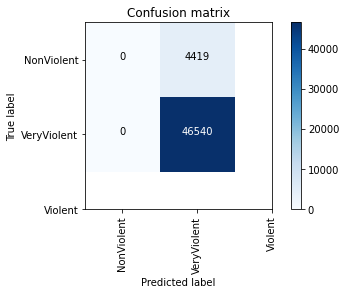

In [ ]:
labels =  ['NonViolent', 'VeryViolent','Violent']
confusion_mtx = confusion_matrix(y_test, LR_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RFC_model = RandomForestClassifier(n_estimators=400,min_samples_split=30)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=30, n_estimators=400)

In [ ]:
RFC_pred = RFC_model.predict(X_test)

In [ ]:
accuracy_score(y_test, RFC_pred)

0.9987440883847799

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, RFC_pred))
labels =  ['NonViolent', 'Violent']

              precision    recall  f1-score   support

  NonViolent       0.99      1.00      0.99      4419
     Violent       1.00      1.00      1.00     46540

    accuracy                           1.00     50959
   macro avg       0.99      1.00      1.00     50959
weighted avg       1.00      1.00      1.00     50959



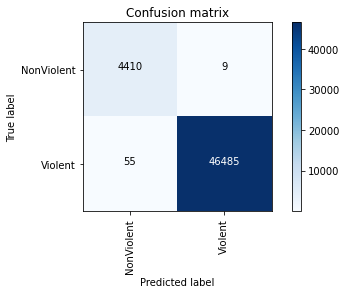

In [ ]:
labels =  ['NonViolent','Violent']
confusion_mtx = confusion_matrix(y_test, RFC_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

## MLPClassifier

In [ ]:
# https://www.youtube.com/watch?v=C6J1cgW6i9Y
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500,activation='relu')
MLP_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [ ]:
MLP_pred = MLP_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, MLP_pred)

0.9132832276928511

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, MLP_pred))
labels =  ['NonViolent','Violent']

              precision    recall  f1-score   support

  NonViolent       0.00      0.00      0.00      4419
     Violent       0.91      1.00      0.95     46540

    accuracy                           0.91     50959
   macro avg       0.46      0.50      0.48     50959
weighted avg       0.83      0.91      0.87     50959



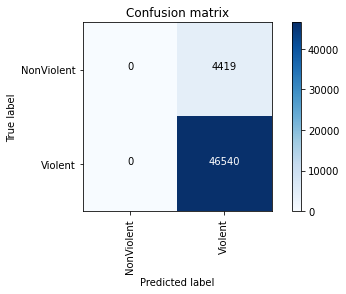

In [ ]:
labels =  ['NonViolent','Violent']
confusion_mtx = confusion_matrix(y_test, MLP_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

## XGB

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# XGB_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
# max_depth=1, random_state=0)
# XGB_model.fit(X_train, y_train)

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0,objective='multi:softprob',num_class=3)
XGB.fit(X_train, y_train)

XGBClassifier(learning_rate=1.0, max_depth=1, num_class=3,
              objective='multi:softprob')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458629 entries, 201070 to 411751
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   IncidentDate         458629 non-null  int64  
 1   IncidentYear         458629 non-null  int64  
 2   IncidentDayofWeek    458629 non-null  int64  
 3   IncidentSubcategory  458629 non-null  int64  
 4   Resolution           458629 non-null  int64  
 5   Intersection         458629 non-null  int64  
 6   PoliceDistrict       458629 non-null  int64  
 7   Latitude             458629 non-null  float64
 8   Longitude            458629 non-null  float64
 9   IncidentMonth        458629 non-null  int64  
 10  IncidentHour         458629 non-null  int64  
 11  IncidentMinutes      458629 non-null  int64  
 12  Is_weekend           458629 non-null  int64  
 13  Season               458629 non-null  int64  
 14  IndexDayofweek       458629 non-null  int64  
 15  IndexPoliceD

In [ ]:
X_train.dtypes

IncidentDate             int64
IncidentYear             int64
IncidentDayofWeek        int64
IncidentSubcategory      int64
Resolution               int64
Intersection             int64
PoliceDistrict           int64
Latitude               float64
Longitude              float64
IncidentMonth            int64
IncidentHour             int64
IncidentMinutes          int64
Is_weekend               int64
Season                   int64
IndexDayofweek           int64
IndexPoliceDistrict      int64
HourType                 int64
TimePeriod               int64
Address                  int64
dtype: object

In [ ]:
XGB_pred = XGB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, XGB_pred)

0.9999803763810122

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, XGB_pred))
labels =  ['NonViolent','Violent']

              precision    recall  f1-score   support

  NonViolent       1.00      1.00      1.00      4419
     Violent       1.00      1.00      1.00     46540

    accuracy                           1.00     50959
   macro avg       1.00      1.00      1.00     50959
weighted avg       1.00      1.00      1.00     50959



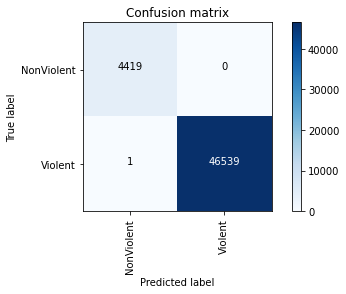

In [ ]:
labels =  ['NonViolent','Violent']
confusion_mtx = confusion_matrix(y_test, XGB_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

In [ ]:
sfpd5[sfpd5['CategoryType']=='Violent']

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,...,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,CategoryType,HourType,TimePeriod,Address
0,5,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,...,21,0,0,spring,1,0,Violent,night,pm,LEAVENWORTH ST
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,...,12,0,1,winter,5,3,Violent,noon,pm,BUCHANAN ST
2,24,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830,...,17,30,0,rainy,4,6,Violent,evening,pm,BURROWS ST
3,20,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636,...,15,10,1,winter,5,8,Violent,evening,pm,BRYANT ST
4,5,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623,...,0,36,0,summer,2,7,Violent,mid-night,am,NEWELL ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566644,16,2020,Thursday,Larceny Theft,Larceny Theft - From Building,Open or Active,AVENUE D \ 09TH TI ST,Southern,37.824119,-122.372658,...,16,0,0,rainy,6,8,Violent,evening,pm,09TH TI ST
566646,1,2020,Saturday,Larceny Theft,Larceny Theft - Shoplifting,Open or Active,GEARY BLVD \ 17TH AVE,Richmond,37.780476,-122.476169,...,17,34,1,rainy,5,5,Violent,evening,pm,17TH AVE
566647,1,2020,Monday,Burglary,Burglary - Commercial,Open or Active,24TH ST \ MINNESOTA ST,Bayview,37.754000,-122.389860,...,1,55,0,summer,0,9,Violent,mid-night,am,MINNESOTA ST
566648,24,2020,Saturday,Larceny Theft,Larceny - From Vehicle,Open or Active,STEINER ST \ FULTON ST,Northern,37.777490,-122.433219,...,17,0,1,winter,5,3,Violent,evening,pm,FULTON ST


In [ ]:
sfpd5

,IncidentDate,IncidentYear,IncidentDayofWeek,IncidentCategory,IncidentSubcategory,Resolution,Intersection,PoliceDistrict,Latitude,Longitude,...,IncidentHour,IncidentMinutes,Is_weekend,Season,IndexDayofweek,IndexPoliceDistrict,CategoryType,HourType,TimePeriod,Address
0,5,2019,Tuesday,Larceny Theft,Larceny Theft - Other,Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,Tenderloin,37.779992,-122.413487,...,21,0,0,spring,1,0,Violent,night,pm,LEAVENWORTH ST
1,22,2018,Saturday,Motor Vehicle Theft,Motor Vehicle Theft,Open or Active,LINDEN ST \ BUCHANAN ST,Northern,37.775787,-122.427819,...,12,0,1,winter,5,3,Violent,noon,pm,BUCHANAN ST
2,24,2018,Friday,Larceny Theft,Larceny - From Vehicle,Open or Active,PERU AVE \ BURROWS ST,Ingleside,37.723944,-122.422830,...,17,30,0,rainy,4,6,Violent,evening,pm,BURROWS ST
3,20,2018,Saturday,Warrant,Other,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,Southern,37.775161,-122.403636,...,15,10,1,winter,5,8,Violent,evening,pm,BRYANT ST
4,5,2019,Wednesday,Other Offenses,Other,Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,Central,37.802755,-122.413623,...,0,36,0,summer,2,7,Violent,mid-night,am,NEWELL ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566645,15,2021,Friday,Robbery,Robbery - Other,Cite or Arrest Adult,OFARRELL ST \ SHANNON ST,Tenderloin,37.785893,-122.412148,...,20,0,0,spring,4,0,NonViolent,night,pm,SHANNON ST
566646,1,2020,Saturday,Larceny Theft,Larceny Theft - Shoplifting,Open or Active,GEARY BLVD \ 17TH AVE,Richmond,37.780476,-122.476169,...,17,34,1,rainy,5,5,Violent,evening,pm,17TH AVE
566647,1,2020,Monday,Burglary,Burglary - Commercial,Open or Active,24TH ST \ MINNESOTA ST,Bayview,37.754000,-122.389860,...,1,55,0,summer,0,9,Violent,mid-night,am,MINNESOTA ST
566648,24,2020,Saturday,Larceny Theft,Larceny - From Vehicle,Open or Active,STEINER ST \ FULTON ST,Northern,37.777490,-122.433219,...,17,0,1,winter,5,3,Violent,evening,pm,FULTON ST


In [ ]:
XGB_pred

array(['Violent', 'Violent', 'Violent', ..., 'Violent', 'Violent',
       'Violent'], dtype=object)

### Feature Importance

In [ ]:
importances = pd.DataFrame({'feature': X_train.columns,
                            'importance': np.round(XGB.feature_importances_, 5)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances

,importance
feature,
IncidentSubcategory,0.99581
IncidentYear,0.00237
Address,0.00182
IncidentMinutes,0.00000
TimePeriod,0.00000
HourType,0.00000
IndexPoliceDistrict,0.00000
IndexDayofweek,0.00000
Season,0.00000


In [ ]:
print('LogisticRegression Model : ', accuracy_score(y_test, LR_pred))
print('Random Forest Model : ', accuracy_score(y_test, RFC_pred))
print('MLP Model : ', accuracy_score(y_test, MLP_pred))
print('XGB Model : ', accuracy_score(y_test, XGB_pred))

LogisticRegression Model :  0.9132832276928511
Random Forest Model :  0.9987440883847799
MLP Model :  0.9132832276928511
XGB Model :  0.9999803763810122


## **Decision Tree**

In [ ]:
# https://www.kaggle.com/code/hamelg/python-for-data-29-decision-trees/notebook
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree_model_pred = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree_model_pred)

0.9999803763810122

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, tree_model_pred))
labels =  ['NonViolent','Violent']

              precision    recall  f1-score   support

  NonViolent       1.00      1.00      1.00      4419
     Violent       1.00      1.00      1.00     46540

    accuracy                           1.00     50959
   macro avg       1.00      1.00      1.00     50959
weighted avg       1.00      1.00      1.00     50959



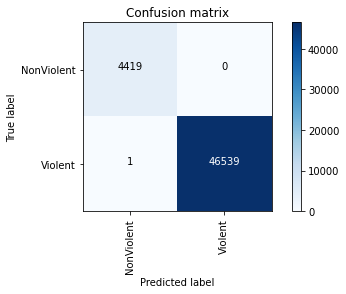

In [ ]:
labels =  ['NonViolent','Violent']
confusion_mtx = confusion_matrix(y_test, tree_model_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

# **HyperParameter Tunning**

### RandomForestClassifier HPT

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
estimator = RandomForestClassifier()
tuned_parameters = [{'max_iter':[500,1000],'hidden_layer_sizes': [4,6,8],
'activation': ['tanh', 'logistic', 'identity', 'relu'],
'batch_size':['auto'], 'learning_rate':['constant','adaptive'],
'solver':['sgd','lbfgs', 'adam'], 'alpha':[0.0001,0.00001],
'learning_rate_init':[0.001]}]
param_grid = {
"min_samples_split" : [2,4,6],
"n_estimators" : [20,50,100],
"bootstrap": [True],"random_state": [42,100,150],"verbose":[1],
"max_features" : ["auto"]}

In [ ]:
RF_model_tuned = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
RF_model_tuned.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.5s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': ['auto'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [20, 50, 100],
                         'random_state': [42, 100, 150], 'verbose': [1]})

In [ ]:
RF_model_tuned.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 50,
 'random_state': 100,
 'verbose': 1}

In [ ]:
pred_RF_model_tuned = RF_model_tuned.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [ ]:
accuracy_score(y_test, pred_RF_model_tuned)

0.9988225828607312

### MLPClassifier HPT

In [ ]:
# https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

MLP_model_tuned = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
MLP_model_tuned.fit(X_train,y_train)

In [ ]:
MLP_model_tuned.best_params_

In [ ]:
pred_MLP_model_tuned = MLP_model_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_MLP_model_tuned)

### XGBClassifier HPT

In [ ]:
# https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a
# https://xgboost.readthedocs.io/en/latest/parameter.html
from xgboost import XGBClassifier
XGB = XGBClassifier()


In [ ]:
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook 
space={'max_depth':[3, 18, 1],
        'gamma':[1,9],
        'reg_alpha' :[40,180,1],
        'reg_lambda' :[0,1],
        'colsample_bytree' :[0.5,1],
        'min_child_weight' : [0, 10, 1],
        'n_estimators': [180],
        'seed': [0]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
XGB_model_tuned = GridSearchCV(XGB, space, n_jobs=-1, cv=5)
XGB_model_tuned.fit(X_train,y_train)

In [ ]:
XGB_model_tuned.best_params_

In [ ]:
pred_XGB_model_tuned = XGB_model_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_XGB_model_tuned)

Reverse Geocoding - reference material

https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6
https://colab.research.google.com/github/shakasom/geocoding/blob/master/ReverseGeocoding.ipynb
https://stackoverflow.com/questions/66144427/how-do-i-get-zipcodes-from-longitude-and-latitude-on-python
https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe
https://stackoverflow.com/questions/35952257/check-string-none-or-not-in-python-2-7
https://stackoverflow.com/questions/9926446/how-to-check-whether-a-strvariable-is-empty-or-not